<a href="https://colab.research.google.com/github/aayomide/analyzing-crypto-data/blob/main/Real_Bitcoin_Trading_Volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# “Real” Bitcoin Trading Volume
`Task:`
- Aggregate the “real” volume of Bitcoin from January 1st, 2022 up to now, and plot it together with the Bitcoin price.
- List out the important statistics of Bitcoin’s real volume from 2022 and discuss any findings/correlations you believe are interesting.

Data Source: [CryptoCompare’s API](https://min-api.cryptocompare.com/documentation) 

# Solution
Bitwise Research argues that [only 10 exchanges have actual volume*](https://twitter.com/BitwiseInvest/status/1109114656944209921). Thus, to get the "real" trading volume of Bitcoin, I'll be scraping bitcoin historical price & volume data (via the cryptocompare API) from these 10 crypto exchanges only and observing how these values have changed since January 2022.

*The 10 crypto exchanges: `Binance, Bitfinex, Kraken, Bitstamp, Coinbase, Gemini, ItBit, Bittrex, Polobniex, Biflyer`

### 1. Get Historical Price and Volume data
        API call details:    https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=10

In [1]:
# import needed libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime as dt

%matplotlib inline

In [2]:
# cryptocompare api key
api_key = '0a5325f633abe91ee4e49dde89a4d4a7349a648a650b2c39a3771fcdac108475'

# bitwise 10 cryptoexchanges with "real" trading volume
exchanges = ['Binance', 'Bitfinex', 'Kraken', 'Bitstamp', 'Coinbase', 'Gemini', 'ItBit', 'Bittrex', 'Polobniex', 'Biflyer']

In [3]:
baseurl = 'https://min-api.cryptocompare.com/data/v2/histoday'

# define the parameters
from_sym, to_sym, limit, exchange = 'BTC', 'USD', 5, 'Kraken'
parameters = {'fsym': from_sym,
              'tsym': to_sym,
              'limit': limit,
              'e': exchange}

# get data
response = requests.get(baseurl, params=parameters)   

# check the json response content
response.json()

{'Data': {'Aggregated': False,
  'Data': [{'close': 31296.9,
    'conversionSymbol': '',
    'conversionType': 'force_direct',
    'high': 31390,
    'low': 29452.6,
    'open': 30048.2,
    'time': 1652572800,
    'volumefrom': 1579.87,
    'volumeto': 47942256.15},
   {'close': 29826.1,
    'conversionSymbol': '',
    'conversionType': 'force_direct',
    'high': 31296.9,
    'low': 29060,
    'open': 31296.9,
    'time': 1652659200,
    'volumefrom': 3703.17,
    'volumeto': 110880919.71},
   {'close': 30408.3,
    'conversionSymbol': '',
    'conversionType': 'force_direct',
    'high': 30742,
    'low': 29403,
    'open': 29826.1,
    'time': 1652745600,
    'volumefrom': 2810.86,
    'volumeto': 84766667.53},
   {'close': 28664.3,
    'conversionSymbol': '',
    'conversionType': 'force_direct',
    'high': 30653.1,
    'low': 28589.1,
    'open': 30408.3,
    'time': 1652832000,
    'volumefrom': 4177.52,
    'volumeto': 122249776.46},
   {'close': 30280.7,
    'conversionSymbol

In [4]:
# get the needed data from the json payload
data = response.json()['Data']['Data']
data

[{'close': 31296.9,
  'conversionSymbol': '',
  'conversionType': 'force_direct',
  'high': 31390,
  'low': 29452.6,
  'open': 30048.2,
  'time': 1652572800,
  'volumefrom': 1579.87,
  'volumeto': 47942256.15},
 {'close': 29826.1,
  'conversionSymbol': '',
  'conversionType': 'force_direct',
  'high': 31296.9,
  'low': 29060,
  'open': 31296.9,
  'time': 1652659200,
  'volumefrom': 3703.17,
  'volumeto': 110880919.71},
 {'close': 30408.3,
  'conversionSymbol': '',
  'conversionType': 'force_direct',
  'high': 30742,
  'low': 29403,
  'open': 29826.1,
  'time': 1652745600,
  'volumefrom': 2810.86,
  'volumeto': 84766667.53},
 {'close': 28664.3,
  'conversionSymbol': '',
  'conversionType': 'force_direct',
  'high': 30653.1,
  'low': 28589.1,
  'open': 30408.3,
  'time': 1652832000,
  'volumefrom': 4177.52,
  'volumeto': 122249776.46},
 {'close': 30280.7,
  'conversionSymbol': '',
  'conversionType': 'force_direct',
  'high': 30503.7,
  'low': 28649.2,
  'open': 28664.3,
  'time': 165291

##### Putting it together
Next, we create a function to dynamically scrape bitcoin historical data from the 10 exchanges

In [5]:
# "limit" parameters represent the number of days we need data for, since we need data from January 2022, we calculate
# number of days elapsed since January 2022 till date.

end_date = dt.utcnow()                            # today's date
start_date = dt.strptime('2022/1/1', "%Y/%m/%d")  # parse January 1,2020 to datetime object

period_days = abs((end_date - start_date).days)    # get days betweeen two dates

In [6]:
# Get BTC/USD trading volume and price data
def get_hist_data(from_sym='BTC', to_sym='USD', limit='5', exchange=''):
    baseurl = 'https://min-api.cryptocompare.com/data/v2/histoday'
    
    parameters = {'fsym': from_sym,
                  'tsym': to_sym,
                  'limit': limit,
                  'e': exchange}
    
    if exchange == 'Binance':
        parameters['tsym'] = 'USDT'                     # Binance market doesnt exist for the BTC/USD coin pair on cryptocompare
    
    response = requests.get(baseurl, params=parameters)   # make a call to the api to the get data
    print(f"{exchange} btc data collected...")
    
    data = response.json()['Data']['Data']                # get the needed data from the json payload
    
    return data


# transform JSON payload into pandas dataframe
def data_to_dataframe(data, exchange):
    df = pd.DataFrame.from_dict(data)                    # since the data from json is in array of dictionaries
    
    df['time'] = pd.to_datetime(df['time'], unit='s')    # convert time from epoch/unix format to regular dates format
    df['exchange'] = exchange
    
    # add %change in price and %change in volume columns %change = (current price - old price) / old price
    df['%change_price'] = (df.close - df.close.shift())/df.close.shift() * 100
    df['%change_volume'] = round((df.volumefrom - df.volumefrom.shift())/df.volumefrom.shift() * 100, 2)
    
    print(f"{exchange} dataframe ready ...\n")
    
    return df

In [7]:
exchanges = ['Binance', 'Bitfinex', 'Kraken', 'Bitstamp', 'Coinbase', 'Gemini', 'ItBit', 'Bittrex', 'Poloniex', 'Biflyer']
df_all =  pd.DataFrame()

# exclude 2 of the 10 exchanges because they returned 0volume and constant price results - unclear why this happened
for exchange in exchanges[:-2]:
    data = get_hist_data(limit=period_days, exchange=exchange)
    df = data_to_dataframe(data, exchange)    # transform json response data for each exchange to a pandas dataframe
    df_all = df_all.append(df)                # combine data for all exchanges into one dataframe
    
print("All set!")

Binance btc data collected...
Binance dataframe ready ...

Bitfinex btc data collected...
Bitfinex dataframe ready ...

Kraken btc data collected...
Kraken dataframe ready ...

Bitstamp btc data collected...
Bitstamp dataframe ready ...

Coinbase btc data collected...
Coinbase dataframe ready ...

Gemini btc data collected...
Gemini dataframe ready ...

ItBit btc data collected...
ItBit dataframe ready ...

Bittrex btc data collected...
Bittrex dataframe ready ...

All set!


In [8]:
print(df_all.shape)
df_all.head()

(1120, 12)


,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,exchange,%change_price,%change_volume
0,2022-01-01,47722.65,47954.63,46208.37,46216.93,19604.46,9.241552e+08,force_direct,,Binance,NaN,NaN
1,2022-01-02,47286.18,47990.00,46654.00,47722.65,18340.46,8.666110e+08,force_direct,,Binance,-0.914597,-6.45
2,2022-01-03,46446.10,47570.00,45696.00,47286.18,27662.08,1.292204e+09,force_direct,,Binance,-1.776587,50.83
3,2022-01-04,45832.01,47557.54,45500.00,46446.10,35520.89,1.650557e+09,force_direct,,Binance,-1.322156,28.41
4,2022-01-05,43451.13,47070.00,42500.00,45832.01,51784.12,2.334289e+09,force_direct,,Binance,-5.194797,45.78


corroborate here
<!-- https://ng.investing.com/crypto/bitcoin/btc-usd-historical-data -->

- `close` is the closing price of the crypto at end of a given day
- The volume is usually measured in different ways, but the most common is known as `volumefrom` which means that the transactions are measured in the first currency in the pair (Bitcoin in this case). 
- `volumeto` is the same but measured in the second currency in the pair (USD for this example).
- `%change` tells how much the price/volume on a given day increased or decreased from the previous day's value

In [9]:
# df_all.close.shift()
# df_all.close
# %change = (current price - old price) / old price
# df_all['%change'] = (df_all.close - df_all.close.shift())/df_all.close.shift() * 100

In [10]:
# verify the dataframe contains data on all 8 exchanges
print(df_all.exchange.nunique())
df_all.exchange.unique()

8


array(['Binance', 'Bitfinex', 'Kraken', 'Bitstamp', 'Coinbase', 'Gemini',
       'ItBit', 'Bittrex'], dtype=object)

## 2. Visualizing Changes in BTC Price and Volume

In [11]:
# get average daily price and volume across all exchanges
daily_price_volume = df_all.groupby('time')[['close', 'volumeto', 'volumefrom']].agg({'close': 'mean', 
                                                                                     'volumeto': 'sum',
                                                                                     'volumefrom': 'sum'})

# get average daily change in price and volume across all exchanges
daily_change = df_all.groupby('time')[['close', '%change_price', '%change_volume']].agg({'%change_price': 'mean', 
                                                                                         '%change_volume': 'mean'})

daily_price_volume.head(2)

,close,volumeto,volumefrom
time,,,
2022-01-01,47742.21625,1.653008e+09,35078.40
2022-01-02,47312.31125,1.407629e+09,29791.89


In [12]:
# get dates when the highest and lowest bitcoin volume were recorded in 2022
max_vol = daily_price_volume[daily_price_volume.volumefrom==daily_price_volume.volumefrom.max()]
min_vol = daily_price_volume[daily_price_volume.volumefrom==daily_price_volume.volumefrom.min()]

# get dates when the highest and lowest bitcoin prices were recorded in 2022
min_price = daily_price_volume[daily_price_volume.close==daily_price_volume.close.min()]
max_price = daily_price_volume[daily_price_volume.close==daily_price_volume.close.max()]

In [13]:
max_price

,close,volumeto,volumefrom
time,,,
2022-01-01,47742.21625,1.653008e+09,35078.4


### 2.1 Correlation between Bitcoin Price and Volume

In [14]:
daily_price_volume['close'].corr(daily_price_volume['volumefrom'])

-0.5091573028816468

>Bitcoin price and Volume share a strong negative correlation, i.e., as price climb, volume tends to decrease and as price drops, volume tends to increase.
\
Meaning there seem to be more trading activities whenever the the bitcoin price dips. We'll confirm this in the visualizations below.

### 2.2 Changes in BTC Price since January 1st, 2022

In [15]:
# daily_price_volume_data.close.sort_values(ascending=False).head(39)
print(f'Max btc price: ${round(max_price.close[0])} - occurred on {str(max_price.index[0])}')
print(f'Min btc price: ${round(min_price.close[0])} - occurred on {str(min_price.index[0])}\n')


print(f'%change: {round((min_price.close[0] - max_price.close[0]) / max_price.close[0] * 100, 2)}%')

Max btc price: $47742 - occurred on 2022-01-01 00:00:00
Min btc price: $28679 - occurred on 2022-05-18 00:00:00

%change: -39.93%


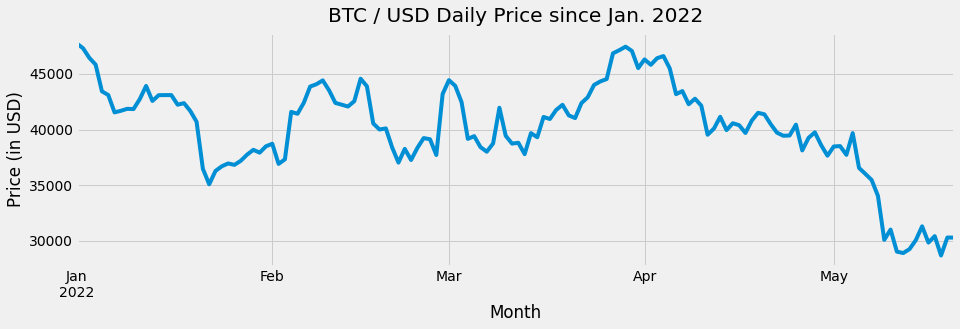

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,4))
daily_price_volume['close'].plot()

plt.title('BTC / USD Daily Price since Jan. 2022', y=1.02)
plt.xlabel('Month')
plt.ylabel('Price (in USD)')

plt.show()

> - So far in 2022, Bitcoin Price has been at its highest in early January and late March. 
> - Since late March when Bitcoin price nearly hit its January high, price has gradually dropped - falling hardest in May.
>- As at May, Bitcoin price has dropped by as much as 40% of its 2022 high.

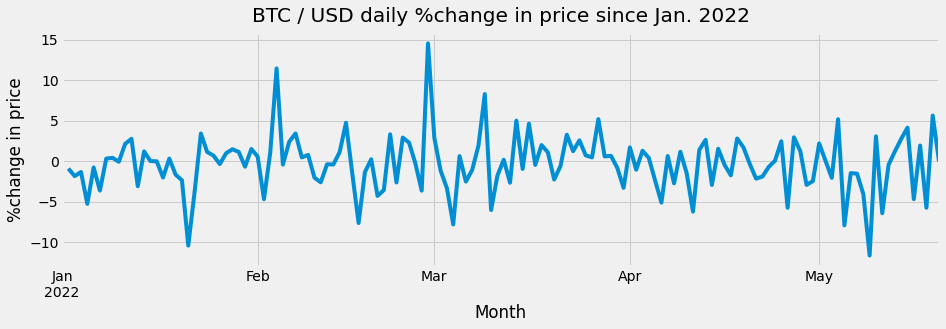

In [20]:
plt.figure(figsize=(14,4))
daily_change['%change_price'].plot()
# daily_change['%change_volume'].plot()

plt.title('BTC / USD daily %change in price since Jan. 2022', y=1.02)
plt.xlabel('Month')
plt.ylabel('%change in price')
plt.show()

### 2.3 Changes in "real" trading volume Price since January 1st, 2022
Crypto trading volume indicates how much - in monetary terms - a given cryptocurrency is being bought and sold over a period of time. It is one of the most fundamental influences of price. The change in volume over time also gives us a sense of interest in the project.

The total volume traded for a given cryptocurrency has a direct relationship with how volatile it is. Remember, price represents the balance of opinions between buyers and sellers. If an equal amount (in terms of volume) is being bought and sold then price will be stable.


<!-- - https://learncrypto.com/knowledge-base/how-to-trade-crypto/understanding-crypto-trading-volume
- https://mixedanalytics.com/blog/best-crypto-apis-for-data-collection/ -->

In [21]:
print(f'Max btc volume: ${round(max_vol.volumefrom[0], 2)} - occurred on {str(max_vol.index[0])}')
print(f'Min btc volume: ${round(min_vol.volumefrom[0], 2)} - occurred on {str(min_vol.index[0])}')

Max btc volume: $340025.28 - occurred on 2022-05-11 00:00:00
Min btc volume: $22783.55 - occurred on 2022-04-16 00:00:00


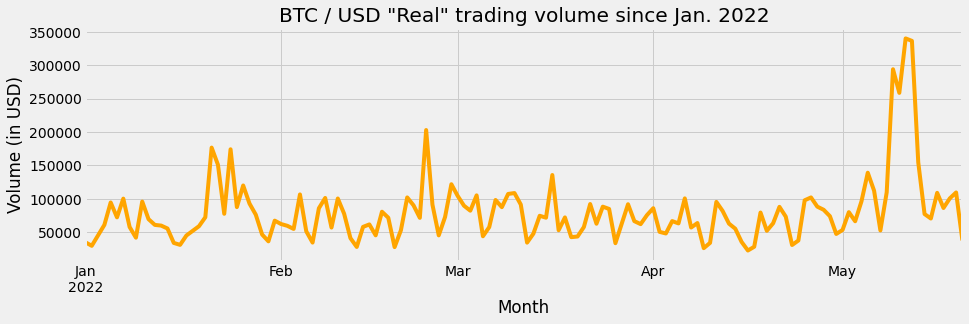

In [22]:
plt.figure(figsize=(14,4))
daily_price_volume['volumefrom'].plot( c='orange')

plt.title('BTC / USD "Real" trading volume since Jan. 2022')
plt.xlabel('Month')
plt.ylabel('Volume (in USD)')

plt.show()

Observing both price and volume graph; whenever there is a spike in tradinig volume, we most likely see a drop in price:

>- As we see in the volume graph, there was a spike in around 3rd week of January coinciding with when prices dropped in January (check the price graph above). We see another noticeable spike in mid-late February which again was when price dropped in that month. 
>- The biggest spike and of course trading volume of the year occured in May in the period when Bitcoin prices fell hard.

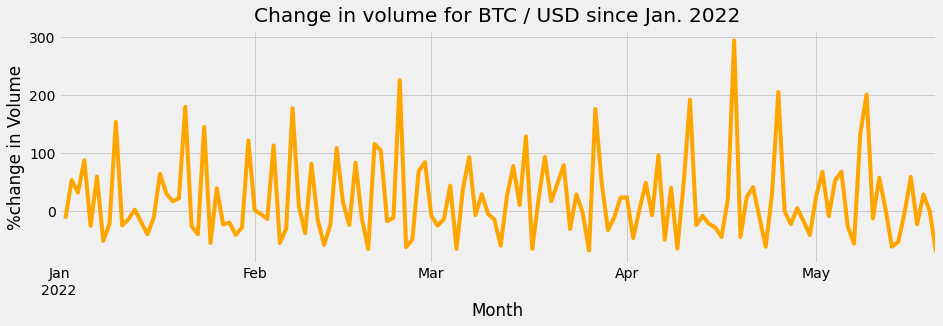

In [23]:
plt.figure(figsize=(14,4))
daily_change['%change_volume'].plot(c='orange')

plt.title('Change in volume for BTC / USD since Jan. 2022', y=1.01)
plt.xlabel('Month')
plt.ylabel('%change in Volume')

plt.show()

### 2.3 Ranking Crypto Exchanges by Average Daily Trading Volume

In [24]:
exchange_daily_avg = df_all.groupby('exchange')[['volumeto', 'volumefrom']].mean()
exchange_daily_avg.sort_values(by='volumefrom', ascending=False)

,volumeto,volumefrom
exchange,,
Binance,1.944196e+09,50075.909786
Coinbase,6.851638e+08,17654.025214
Bitfinex,2.090067e+08,5407.347357
Kraken,1.262323e+08,3238.665357
Bitstamp,8.562910e+07,2234.851786
Gemini,5.183315e+07,1341.295071
ItBit,1.198132e+07,308.908507
Bittrex,6.489720e+06,167.128500


> Insights:
>- In 2022 so far, Binance has been the leading bitcoin exchange in the world, processing on average **$1.95billion** worth of Bitcoin per day.
>- Coinbase is the second largest bitcoin exchange, processing about **\$685million** worth of BTC per day in since January 2022

In [25]:
# df_all.to_csv('btc_data_since_01012022.csv', index=False)

### Conclusion
I successfully scraped the "real" Bitcoin trading volume data since January 2022 across 8 exchanges, via the Cryptocompare API. Then, I briefly explored the relationship between bitcoin price and volume data - confirming that indeed trading volume influences price and vice-versa